In [1]:
pip install statannot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats
from scipy.stats import t
from statannot import add_stat_annotation


import moabb
import moabb.analysis.plotting as moabb_plt
from moabb.analysis.meta_analysis import (  # noqa: E501
    compute_dataset_statistics,
    find_significant_differences,
)

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


# Get the results files

In [3]:
# CNN_DG_sc = pd.read_csv("../results/score_code/CNN_DG_score_code.csv",index_col=0)
# CNN_DA_sc = pd.read_csv("../results/score_code/CNN_DA_score_code.csv",index_col=0)
# CNN_SS_sc = pd.read_csv("../results/score_code/CNN_SS_score_code.csv",index_col=0)
CNN_DGrec_sc = pd.read_csv("../results/score_code/CNN_DG_score_code_recentered.csv",index_col=0)
CNN_DArec_sc = pd.read_csv("../results/score_code/CNN_DA_score_code_recentered.csv",index_col=0)
CNN_SSrec_sc = pd.read_csv("../results/score_code/CNN_SS_score_code_recentered.csv",index_col=0)

# SPD_DG_sc = pd.read_csv("../results/score_code/SPD_DG_score_code.csv",index_col=0)
# SPD_DA_sc = pd.read_csv("../results/score_code/SPD_DA_score_code.csv",index_col=0)
# SPD_SS_sc = pd.read_csv("../results/score_code/SPD_SS_score_code.csv",index_col=0)
SPD_DGrec_sc = pd.read_csv("../results/score_code/SPD_DG_score_code_recentered.csv",index_col=0)
SPD_DArec_sc = pd.read_csv("../results/score_code/SPD_DA_score_code_recentered.csv",index_col=0)
SPD_SSrec_sc = pd.read_csv("../results/score_code/SPD_SS_score_code_recentered.csv",index_col=0)

# SPDBN_DG_sc = pd.read_csv("../results/score_code/SPDBN_DG_score_code.csv",index_col=0)
# SPDBN_DA_sc = pd.read_csv("../results/score_code/SPDBN_DA_score_code.csv",index_col=0)
# SPDBN_SS_sc = pd.read_csv("../results/score_code/SPDBN_SS_score_code.csv",index_col=0)
SPDBN_DGrec_sc = pd.read_csv("../results/score_code/SPDBN_DG_score_code_recentered.csv",index_col=0)
SPDBN_DArec_sc = pd.read_csv("../results/score_code/SPDBN_DA_score_code_recentered.csv",index_col=0)
SPDBN_SSrec_sc = pd.read_csv("../results/score_code/SPDBN_SS_score_code_recentered.csv",index_col=0)

In [72]:
CNN_DG_tst = pd.read_csv("../results/tps_test/CNN_DG_tps_test.csv",index_col=0)
CNN_DA_tst = pd.read_csv("../results/tps_test/CNN_DA_tps_test.csv",index_col=0)
CNN_SS_tst = pd.read_csv("../results/tps_test/CNN_SS_tps_test.csv",index_col=0)
CNN_DGrec_tst = pd.read_csv("../results/tps_test/CNN_DG_tps_test_recentered.csv",index_col=0)
CNN_DArec_tst = pd.read_csv("../results/tps_test/CNN_DA_tps_test_recentered.csv",index_col=0)
CNN_SSrec_tst = pd.read_csv("../results/tps_test/CNN_SS_tps_test_recentered.csv",index_col=0)

SPD_DG_tst = pd.read_csv("../results/tps_test/SPD_DG_tps_test.csv",index_col=0)
SPD_DA_tst = pd.read_csv("../results/tps_test/SPD_DA_tps_test.csv",index_col=0)
SPD_SS_tst = pd.read_csv("../results/tps_test/SPD_SS_tps_test.csv",index_col=0)
SPD_DGrec_tst = pd.read_csv("../results/tps_test/SPD_DG_tps_test_recentered.csv",index_col=0)
SPD_DArec_tst = pd.read_csv("../results/tps_test/SPD_DA_tps_test_recentered.csv",index_col=0)
SPD_SSrec_tst = pd.read_csv("../results/tps_test/SPD_SS_tps_test_recentered.csv",index_col=0)

SPDBN_DG_tst = pd.read_csv("../results/tps_test/SPDBN_DG_tps_test.csv",index_col=0)
SPDBN_DA_tst = pd.read_csv("../results/tps_test/SPDBN_DA_tps_test.csv",index_col=0)
SPDBN_SS_tst = pd.read_csv("../results/tps_test/SPDBN_SS_tps_test.csv",index_col=0)
SPDBN_DGrec_tst = pd.read_csv("../results/tps_test/SPDBN_DG_tps_test_recentered.csv",index_col=0)
SPDBN_DArec_tst = pd.read_csv("../results/tps_test/SPDBN_DA_tps_test_recentered.csv",index_col=0)
SPDBN_SSrec_tst = pd.read_csv("../results/tps_test/SPDBN_SS_tps_test_recentered.csv",index_col=0)

# New dataset

In [8]:
CNN_DG_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/CNN_DG_score_code_recentered.csv",index_col=0)
CNN_DA_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/CNN_DA_score_code_recentered.csv",index_col=0)
CNN_SS_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/CNN_SS_score_code_recentered.csv",index_col=0)
CNN_DGrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/CNN_DG_score_code_recentered.csv",index_col=0)
CNN_DArec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/CNN_DA_score_code_recentered.csv",index_col=0)
CNN_SSrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/CNN_SS_score_code_recentered.csv",index_col=0)

SPD_DG_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPD_DG_score_code_recentered.csv",index_col=0)
SPD_DA_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPD_DA_score_code_recentered.csv",index_col=0)
SPD_SS_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPD_SS_score_code_recentered.csv",index_col=0)
SPD_DGrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPD_DG_score_code_recentered.csv",index_col=0)
SPD_DArec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPD_DA_score_code_recentered.csv",index_col=0)
SPD_SSrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPD_SS_score_code_recentered.csv",index_col=0)

SPDBN_DG_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPDBN_DG_score_code_recentered.csv",index_col=0)
SPDBN_DA_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPDBN_DA_score_code_recentered.csv",index_col=0)
SPDBN_SS_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPDBN_SS_score_code_recentered.csv",index_col=0)
SPDBN_DGrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPDBN_DG_score_code_recentered.csv",index_col=0)
SPDBN_DArec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPDBN_DA_score_code_recentered.csv",index_col=0)
SPDBN_SSrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPDBN_SS_score_code_recentered.csv",index_col=0)

In [4]:
CNN_DG_tst = pd.read_csv("../results/new_dataset/Score_TF/CNN/temps_test_code/DG_tps_test_code.csv",index_col=0)
CNN_DA_tst = pd.read_csv("../results/new_dataset/Score_TF/CNN/temps_test_code/DA_tps_test_code.csv",index_col=0)
CNN_SS_tst = pd.read_csv("../results/new_dataset/Score_TF/CNN/temps_test_code/SS_tps_test_code.csv",index_col=0)

SPD_DG_tst = pd.read_csv("../results/new_dataset/Score_TF/SPD/temps_test_code/DG_tps_test_code.csv",index_col=0)
SPD_DA_tst = pd.read_csv("../results/new_dataset/Score_TF/SPD/temps_test_code/DA_tps_test_code.csv",index_col=0)
SPD_SS_tst = pd.read_csv("../results/new_dataset/Score_TF/SPD/temps_test_code/SS_tps_test_code.csv",index_col=0)

SPDBN_DG_tst = pd.read_csv("../results/new_dataset/Score_TF/SPDBN/temps_test_code/DG_tps_test_code.csv",index_col=0)
SPDBN_DA_tst = pd.read_csv("../results/new_dataset/Score_TF/SPDBN/temps_test_code/DA_tps_test_code.csv",index_col=0)
SPDBN_SS_tst = pd.read_csv("../results/new_dataset/Score_TF/SPDBN/temps_test_code/SS_tps_test_code.csv",index_col=0)

# Calcul the mean

In [4]:
# print("mean of each fold for CNN_DG:\n",CNN_DG_sc.mean(axis=0))
# print("mean of each fold for CNN_DA:\n",CNN_DA_sc.mean(axis=0))
# print("mean of each fold for CNN_SS:\n",CNN_SS_sc.mean(axis=0))
print("mean of each fold for CNN_DGrec:\n",CNN_DGrec_sc.mean(axis=0))
print("mean of each fold for CNN_DA:\n",CNN_DArec_sc.mean(axis=0))
print("mean of each fold for CNN_SSrec:\n",CNN_SSrec_sc.mean(axis=0))

# print("mean of each fold for SPD_DG:\n",SPD_DG_sc.mean(axis=0))
# print("mean of each fold for SPD_DA:\n",SPD_DA_sc.mean(axis=0))
# print("mean of each fold for SPD_SS:\n",SPD_SS_sc.mean(axis=0))
print("mean of each fold for SPD_DGrec:\n",SPD_DGrec_sc.mean(axis=0))
print("mean of each fold for SPD_DA:\n",SPD_DArec_sc.mean(axis=0))
print("mean of each fold for SPD_SSrec:\n",SPD_SSrec_sc.mean(axis=0))

# print("mean of each fold for SPDBN_DG:\n",SPDBN_DG_sc.mean(axis=0))
# print("mean of each fold for SPDBN_DA:\n",SPDBN_DA_sc.mean(axis=0))
# print("mean of each fold for SPDBN_SS:\n",SPDBN_SS_sc.mean(axis=0))
print("mean of each fold for SPDBN_DGrec:\n",SPDBN_DGrec_sc.mean(axis=0))
print("mean of each fold for SPDBN_DA:\n",SPDBN_DArec_sc.mean(axis=0))
print("mean of each fold for SPDBN_SSrec:\n",SPDBN_SSrec_sc.mean(axis=0))

mean of each fold for CNN_DGrec:
 0     0.987
1     0.881
2     0.971
3     0.947
4     0.961
5     0.996
6     0.650
7     0.978
8     0.863
9     1.000
10    0.878
11    0.780
dtype: float64
mean of each fold for CNN_DA:
 0     0.990
1     0.897
2     0.955
3     0.965
4     0.982
5     0.996
6     0.637
7     0.980
8     0.860
9     1.000
10    0.890
11    0.777
dtype: float64
mean of each fold for CNN_SSrec:
 0     0.949
1     0.897
2     0.961
3     0.896
4     0.994
5     0.991
6     0.973
7     0.982
8     0.915
9     1.000
10    0.909
11    0.712
dtype: float64
mean of each fold for SPD_DGrec:
 0     0.961
1     0.888
2     0.952
3     0.935
4     0.998
5     0.981
6     0.937
7     0.952
8     0.875
9     1.000
10    0.877
11    0.796
dtype: float64
mean of each fold for SPD_DA:
 0     0.943
1     0.870
2     0.958
3     0.928
4     1.000
5     0.979
6     0.947
7     0.980
8     0.907
9     1.000
10    0.893
11    0.777
dtype: float64
mean of each fold for SPD_SSrec:
 0     0

In [5]:
# print("median of each fold for CNN_DG:\n",np.median(CNN_DG_sc.median(axis=0)))
# print("median of each fold for CNN_DA:\n",np.median(CNN_DA_sc.median(axis=0)))
# print("median of each fold for CNN_SS:\n",np.median(CNN_SS_sc.median(axis=0)))
print("median of each fold for CNN_DGrec:\n",np.median(CNN_DGrec_sc.median(axis=0)))
print("median of each fold for CNN_DArec:\n",np.median(CNN_DArec_sc.median(axis=0)))
print("median of each fold for CNN_SSrec:\n",np.median(CNN_SSrec_sc.median(axis=0)))

# print("median of each fold for SPD_DG:\n",np.median(SPD_DG_sc.median(axis=0)))
# print("median of each fold for SPD_DA:\n",np.median(SPD_DA_sc.median(axis=0)))
# print("median of each fold for SPD_SS:\n",np.median(SPD_SS_sc.median(axis=0)))
print("median of each fold for SPD_DGrec:\n",np.median(SPD_DGrec_sc.median(axis=0)))
print("median of each fold for SPD_DArec:\n",np.median(SPD_DArec_sc.median(axis=0)))
print("median of each fold for SPD_SSrec:\n",np.median(SPD_SSrec_sc.median(axis=0)))

# print("median of each fold for SPDBN_DG:\n",np.median(SPDBN_DG_sc.median(axis=0)))
# print("median of each fold for SPDBN_DA:\n",np.median(SPDBN_DA_sc.median(axis=0)))
# print("median of each fold for SPDBN_SS:\n",np.median(SPDBN_SS_sc.median(axis=0)))
print("median of each fold for SPDBN_DGrec:\n",np.median(SPDBN_DGrec_sc.median(axis=0)))
print("median of each fold for SPDBN_DArec:\n",np.median(SPDBN_DArec_sc.median(axis=0)))
print("median of each fold for SPDBN_SSrec:\n",np.median(SPDBN_SSrec_sc.median(axis=0)))

median of each fold for CNN_DGrec:
 0.955
median of each fold for CNN_DArec:
 0.9575
median of each fold for CNN_SSrec:
 0.955
median of each fold for SPD_DGrec:
 0.945
median of each fold for SPD_DArec:
 0.95
median of each fold for SPD_SSrec:
 0.94
median of each fold for SPDBN_DGrec:
 0.93
median of each fold for SPDBN_DArec:
 0.93
median of each fold for SPDBN_SSrec:
 0.94


# Statistical test

In [6]:
def corrected_std(differences, n_train, n_test):
    """Corrects standard deviation using Nadeau and Bengio's approach.

    Parameters
    ----------
    differences : ndarray of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    corrected_std : float
        Variance-corrected standard deviation of the set of differences.
    """
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std

In [7]:
def compute_corrected_ttest(differences, df, n_train, n_test):
    """Computes right-tailed paired t-test with corrected variance.

    Parameters
    ----------
    differences : array-like of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    df : int
        Degrees of freedom.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    t_stat : float
        Variance-corrected t-statistic.
    p_val : float
        Variance-corrected p-value.
    """
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

## score code

In [8]:
# CNN_DG_v = np.concatenate(CNN_DG_sc.values)
# CNN_DA_v = np.concatenate(CNN_DA_sc.values)
# CNN_SS_v = np.concatenate(CNN_SS_sc.values)
CNN_DGrec_v = np.concatenate(CNN_DGrec_sc.values)
CNN_DArec_v = np.concatenate(CNN_DArec_sc.values)
CNN_SSrec_v = np.concatenate(CNN_SSrec_sc.values)

# SPD_DG_v = np.concatenate(SPD_DG_sc.values)
# SPD_DA_v = np.concatenate(SPD_DA_sc.values)
# SPD_SS_v = np.concatenate(SPD_SS_sc.values)
SPD_DGrec_v = np.concatenate(SPD_DGrec_sc.values)
SPD_DArec_v = np.concatenate(SPD_DArec_sc.values)
SPD_SSrec_v = np.concatenate(SPD_SSrec_sc.values)

# SPDBN_DG_v = np.concatenate(SPDBN_DG_sc.values)
# SPDBN_DA_v = np.concatenate(SPDBN_DA_sc.values)
# SPDBN_SS_v = np.concatenate(SPDBN_SS_sc.values)
SPDBN_DGrec_v = np.concatenate(SPDBN_DGrec_sc.values)
SPDBN_DArec_v = np.concatenate(SPDBN_DArec_sc.values)
SPDBN_SSrec_v = np.concatenate(SPDBN_SSrec_sc.values)

n_train_DG = 26400
n_train_DA = 27040
n_train_SS = 1120

n_test_DG = 7020
n_test_DA = 5148
n_test_SS = 3744

In [36]:
# CNN_DG_v_mean = CNN_DG_sc.mean(axis=0).values
# CNN_DA_v_mean = CNN_DA_sc.mean(axis=0).values
# CNN_SS_v_mean = CNN_SS_sc.mean(axis=0).values
CNN_DGrec_v_mean = CNN_DGrec_sc.mean(axis=0).values
CNN_DArec_v_mean = CNN_DArec_sc.mean(axis=0).values
CNN_SSrec_v_mean = CNN_SSrec_sc.mean(axis=0).values

# SPD_DG_v_mean = SPD_DG_sc.mean(axis=0).values
# SPD_DA_v_mean = SPD_DA_sc.mean(axis=0).values
# SPD_SS_v_mean = SPD_SS_sc.mean(axis=0).values
SPD_DGrec_v_mean = SPD_DGrec_sc.mean(axis=0).values
SPD_DArec_v_mean = SPD_DArec_sc.mean(axis=0).values
SPD_SSrec_v_mean = SPD_SSrec_sc.mean(axis=0).values

# SPDBN_DG_v_mean = SPDBN_DG_sc.mean(axis=0).values
# SPDBN_DA_v_mean = SPDBN_DA_sc.mean(axis=0).values
# SPDBN_SS_v_mean = SPDBN_SS_sc.mean(axis=0).values
SPDBN_DGrec_v_mean = SPDBN_DGrec_sc.mean(axis=0).values
SPDBN_DArec_v_mean = SPDBN_DArec_sc.mean(axis=0).values
SPDBN_SSrec_v_mean = SPDBN_SSrec_sc.mean(axis=0).values

In [10]:
model_scores = [CNN_DG_v,CNN_DA_v,CNN_SS_v,CNN_DGrec_v,CNN_DArec_v,CNN_SSrec_v,
                SPD_DG_v,SPD_DA_v,SPD_SS_v,SPD_DGrec_v,SPD_DArec_v,SPD_SSrec_v,
                SPDBN_DG_v,SPDBN_DA_v,SPDBN_SS_v,SPDBN_DGrec_v,SPDBN_DArec_v,SPDBN_SSrec_v
                ]
model_scores_mean = [CNN_DG_v_mean,CNN_DA_v_mean,CNN_SS_v_mean,CNN_DGrec_v_mean,CNN_DArec_v_mean,CNN_SSrec_v_mean,
                     SPD_DG_v_mean,SPD_DA_v_mean,SPD_SS_v_mean,SPD_DGrec_v_mean,SPD_DArec_v_mean,SPD_SSrec_v_mean,
                     SPDBN_DG_v_mean,SPDBN_DA_v_mean,SPDBN_SS_v_mean,SPDBN_DGrec_v_mean,SPDBN_DArec_v_mean,SPDBN_SSrec_v_mean
                     ]
names = ["CNN_DG","CNN_DA","CNN_SS","CNN_DGrec","CNN_DArec","CNN_SSrec",
         "SPD_DG","SPD_DA","SPD_SS","SPD_DGrec","SPD_DArec","SPD_SSrec",
         "SPDBN_DG","SPDBN_DA","SPDBN_SS","SPDBN_DGrec","SPDBN_DArec","SPDBN_SSrec"
         ]
list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,
                n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,
               n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

NameError: name 'CNN_DG_v' is not defined

In [37]:
model_scores = [CNN_DGrec_v,CNN_DArec_v,CNN_SSrec_v,
                SPD_DGrec_v,SPD_DArec_v,SPD_SSrec_v,
                SPDBN_DGrec_v,SPDBN_DArec_v,SPDBN_SSrec_v
                ]
model_scores_mean = [CNN_DGrec_v_mean,CNN_DArec_v_mean,CNN_SSrec_v_mean,
                     SPD_DGrec_v_mean,SPD_DArec_v_mean,SPD_SSrec_v_mean,
                     SPDBN_DGrec_v_mean,SPDBN_DArec_v_mean,SPDBN_SSrec_v_mean
                     ]
names = ["CNN_DGrec","CNN_DArec","CNN_SSrec",
         "SPD_DGrec","SPD_DArec","SPD_SSrec",
         "SPDBN_DGrec","SPDBN_DArec","SPDBN_SSrec"
         ]
setting = ["DG","DA","SS",
         "DG","DA","SS",
         "DG","DA","SS"
         ]
list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
# list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,
#                n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

### Through MOABB

In [31]:
results_all = pd.DataFrame()
results_rec = pd.DataFrame()
results_nor = pd.DataFrame()


for i, score in enumerate(model_scores_mean):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],
                   "n_samples":list_n_train[i],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_all = results_all.append(new_row, ignore_index=True)
        if (i//3) % 2 == 0:
            results_nor = results_nor.append(new_row, ignore_index=True)
        else:
            results_rec = results_rec.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_22584\3384058090.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all = results_all.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_22584\3384058090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_nor = results_nor.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_22584\3384058090.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all = results_all.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_22584\3384058090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [79]:
results_all = pd.DataFrame()
results_rec = pd.DataFrame()
results_nor = pd.DataFrame()


for i, score in enumerate(model_scores_mean):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],
                   "n_samples":list_n_train[i],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec = results_rec.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_22584\1865539240.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_22584\1865539240.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_22584\1865539240.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_22584\1865539240.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [81]:
results_rec

,dataset,subject,session,score,n_samples,n_channels,pipeline,method
0,BurstVEP,0,1,0.987,26400,32,CNN_DGrec,CNN
1,BurstVEP,1,1,0.881,26400,32,CNN_DGrec,CNN
2,BurstVEP,2,1,0.971,26400,32,CNN_DGrec,CNN
3,BurstVEP,3,1,0.947,26400,32,CNN_DGrec,CNN
4,BurstVEP,4,1,0.961,26400,32,CNN_DGrec,CNN
...,...,...,...,...,...,...,...,...
103,BurstVEP,7,1,0.988,1120,32,SPDBN_SSrec,SPDBN
104,BurstVEP,8,1,0.883,1120,32,SPDBN_SSrec,SPDBN
105,BurstVEP,9,1,1.000,1120,32,SPDBN_SSrec,SPDBN
106,BurstVEP,10,1,0.909,1120,32,SPDBN_SSrec,SPDBN


In [72]:
# fig1 = moabb_plt.paired_plot(results_rec, "CNN_DGrec", "CNN_SSrec")
# fig2 = moabb_plt.paired_plot(results_rec, "CNN_DArec", "CNN_SSrec")
# fig3 = moabb_plt.paired_plot(results_rec, "SPD_SSrec", "CNN_SSrec")
# fig1 = moabb_plt.paired_plot(results_rec, "SPD_DGrec", "SPD_SSrec")
# fig2 = moabb_plt.paired_plot(results_rec, "SPD_DArec", "SPD_SSrec")
# fig3 = moabb_plt.paired_plot(results_rec, "SPD_SSrec", "SPDBN_SSrec")
# fig2 = moabb_plt.paired_plot(results_rec, "SPDBN_DArec", "SPDBN_SSrec")
# fig3 = moabb_plt.paired_plot(results_rec, "SPDBN_DGrec", "SPDBN_SSrec")
# # plt.show()

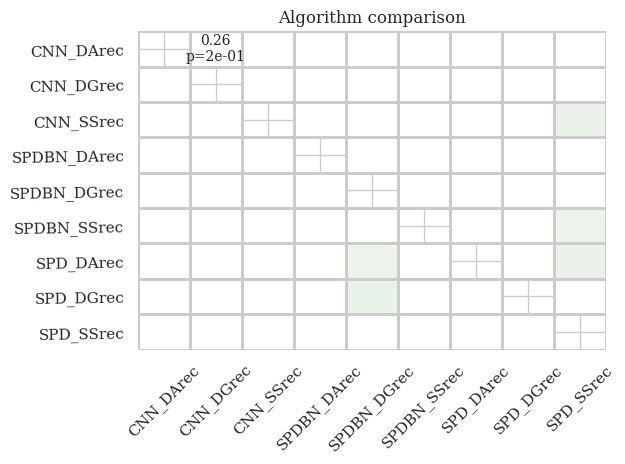

In [82]:
# stats = compute_dataset_statistics(results_all)
# P_all, T = find_significant_differences(stats)


# moabb_plt.summary_plot(P_all, T)
# plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

# stats = compute_dataset_statistics(results_nor)
# P, T = find_significant_differences(stats)

# moabb_plt.summary_plot(P, T)
# plt.show()

In [58]:
P

,CNN_DArec,CNN_DGrec,CNN_SSrec,SPDBN_DArec,SPDBN_DGrec,SPDBN_SSrec,SPD_DArec,SPD_DGrec,SPD_SSrec
CNN_DArec,NaN,0.180908,0.632080,0.593506,0.507568,0.565674,0.636963,0.556396,0.513916
CNN_DGrec,0.811768,NaN,0.693604,0.670654,0.520996,0.620850,0.731201,0.668701,0.530029
CNN_SSrec,0.367432,0.305908,NaN,0.386963,0.168213,0.279541,0.507568,0.425049,0.009521
SPDBN_DArec,0.406006,0.329346,0.613037,NaN,0.074951,0.449463,0.800537,0.612061,0.177979
SPDBN_DGrec,0.492432,0.479004,0.830566,0.925049,NaN,0.792725,0.956055,0.994385,0.356689
SPDBN_SSrec,0.434326,0.378662,0.715088,0.548096,0.207520,NaN,0.847900,0.603271,0.027588
SPD_DArec,0.359619,0.266846,0.492432,0.196533,0.044189,0.150635,NaN,0.312256,0.008545
SPD_DGrec,0.443115,0.330322,0.574951,0.383545,0.005615,0.395264,0.687256,NaN,0.129150
SPD_SSrec,0.486084,0.469971,0.990479,0.820557,0.642090,0.971436,0.991455,0.870361,NaN


### get the interresting p-value

In [58]:


p_values_by_sort_nor = [P_all.iloc[4,0],P_all.iloc[4,1],P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[16,13],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7],P_all.iloc[7,6]]
p_values_by_sort_nor_sgf = [P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7]]


p_values_by_sort_rec = [P_all.iloc[5,3],P_all.iloc[5,2],P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]
p_values_by_sort_rec_sgf = [P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]


### Graph

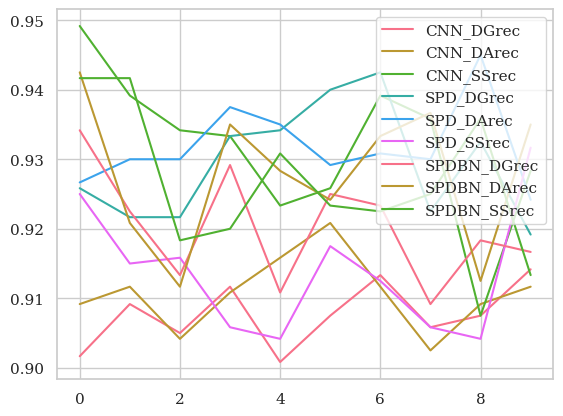

In [35]:
plt.figure()

for i,n in enumerate(names):
    plt.plot([np.mean(model_scores[i][k*12:(k+1)*12]) for k in range(10)],label=n)

plt.legend()
plt.show()

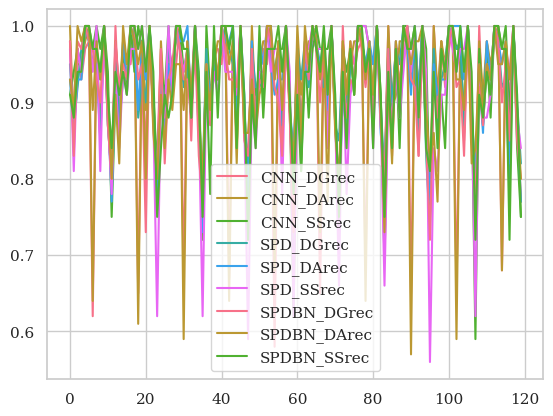

In [36]:
plt.figure()

for i,n in enumerate(names):
    plt.plot(model_scores[i],label=n)

plt.legend()
plt.show()

In [16]:
box_pairs_nor = [(("CNN", "CNN_SS"), ("CNN", "CNN_DG")),
                                 (("CNN", "CNN_SS"), ("CNN", "CNN_DA")),
                                 (("CNN", "CNN_DA"), ("CNN", "CNN_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DG")),
                                 (("SPD", "SPD_DA"), ("SPD", "SPD_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DA")),
                                 (("SPDBN", "SPDBN_DA"), ("SPDBN", "SPDBN_DG")),
                                ]
box_pairs_nor_sgf = [(("CNN", "CNN_DA"), ("CNN", "CNN_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DG")),
                                 (("SPD", "SPD_DA"), ("SPD", "SPD_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DA")),
                                ]

box_pairs_rec = [(("CNN", "CNN_SSrec"), ("CNN", "CNN_DGrec")),
                                 (("CNN", "CNN_SSrec"), ("CNN", "CNN_DArec")),
                                 (("CNN", "CNN_DArec"), ("CNN", "CNN_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DArec")),
                                 (("SPD", "SPD_DArec"), ("SPD", "SPD_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DArec")),
                                 (("SPDBN", "SPDBN_DArec"), ("SPDBN", "SPDBN_DGrec")),
                                ]
box_pairs_rec_sgf = [(("CNN", "CNN_DArec"), ("CNN", "CNN_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DArec")),
                                 (("SPD", "SPD_DArec"), ("SPD", "SPD_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DArec")),
                                 (("SPDBN", "SPDBN_DArec"), ("SPDBN", "SPDBN_DGrec")),
                                ]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
CNN_CNN_DArec v.s. CNN_CNN_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=3.300e+01
Using zero_method  pratt
CNN_CNN_DGrec v.s. CNN_CNN_DArec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=2.800e+01
Using zero_method  pratt
SPD_SPD_DGrec v.s. SPD_SPD_DArec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=3.500e+01
Using zero_method  pratt
SPD_SPD_DArec v.s. SPD_SPD_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.850e-01 stat=9.000e+00


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  pratt
SPDBN_SPDBN_DArec v.s. SPDBN_SPDBN_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=3.600e+01
Using zero_method  pratt
SPDBN_SPDBN_DGrec v.s. SPDBN_SPDBN_DArec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=2.150e+01
Using zero_method  pratt
CNN_CNN_DGrec v.s. CNN_CNN_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=3.500e+01
Using zero_method  pratt
SPD_SPD_DGrec v.s. SPD_SPD_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=2.650e+01
Using zero_method  pratt
SPDBN_SPDBN_DGrec v.s. SPDBN_SPDBN_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=2.900e+01


Text(0.5, 1.0, 'Accuracy score of differents pipelines')

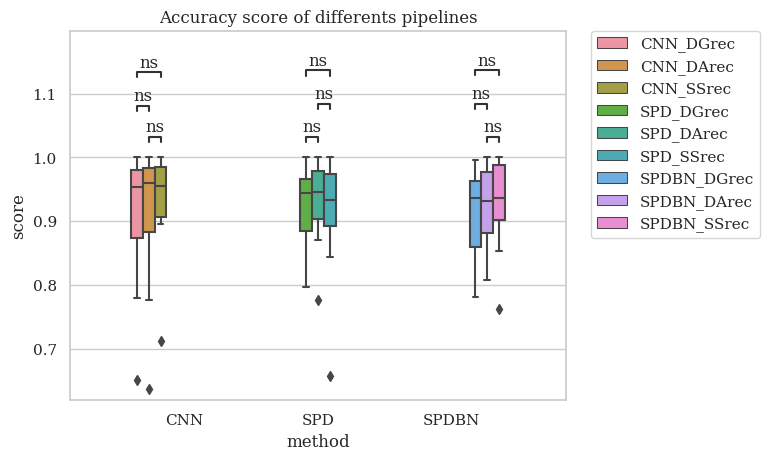

In [59]:
x = "method"
y = "score"
hue = "pipeline"

colors = mcolors.CSS4_COLORS

fig1 = plt.figure(1)
ax = sns.boxplot(data=results_rec, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_rec, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec, test='Wilcoxon',
                    perform_stat_test=True, text_format='star', loc='inside', verbose=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(True,which='minor')
plt.title("Accuracy score of differents pipelines")

C:\Users\s.velut\AppData\Local\Temp\ipykernel_22584\97095190.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],


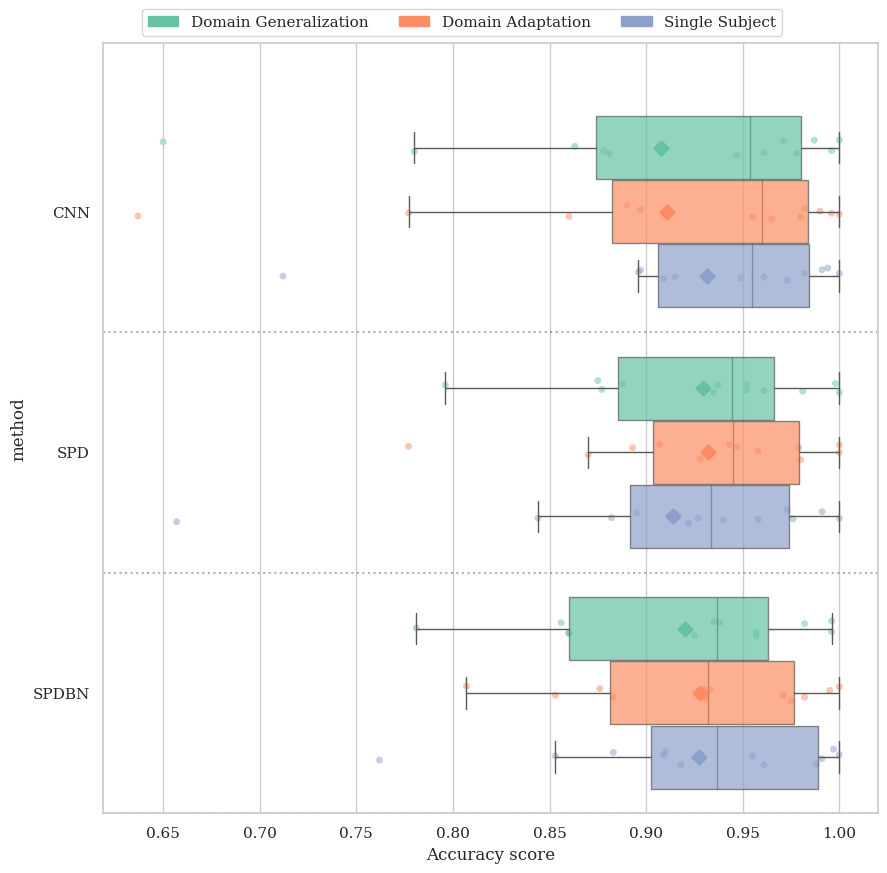

In [61]:
import PtitPrince as pt

x = "method"
y = "score"
hue = "pipeline"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec.copy()
temp.insert(1,"procedure",np.repeat(["DG","DA","SS","DG","DA","SS","DG","DA","SS"],12),True)

n_pi = 3
palette = dict(zip(["DG","DA","SS","DG","DA","SS","DG","DA","SS"], sns.color_palette('Set2', 3)*3))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    hue='procedure',
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
ax.set_xlim(right=1.02)
DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
          handles=[DG_patch,DA_patch,SS_patch],
             loc=(0.05, 1.01), ncols=n_pi)

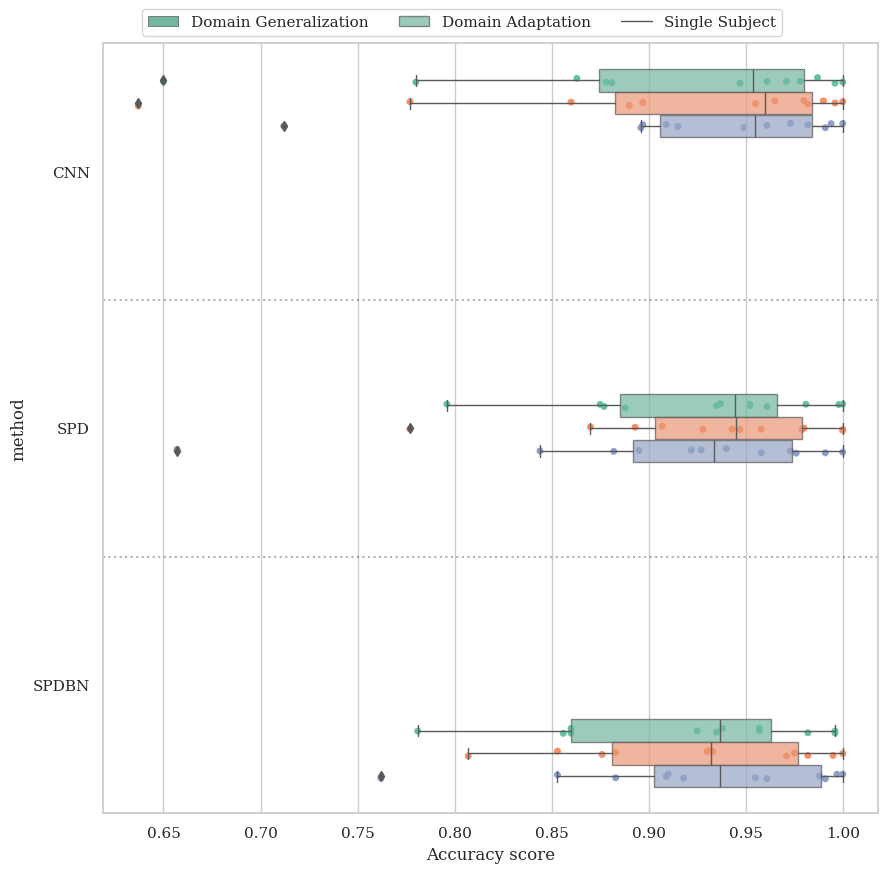

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

x = "score"
y = "method"
hue = "pipeline"

sns.boxplot(data=results_rec,
            y=y,
            x=x,
            hue=hue,
            linewidth=boxplot_lw,
            whiskerprops=boxplot_props,
            medianprops=boxplot_props,
            palette=palette,
            ax=ax,
            dodge="auto",
            boxprops=dict(alpha=0.7),
            orient='h')

sns.stripplot(data=results_rec,
              y=y,
              x=x,
              hue=hue,
              ax=ax,
              dodge=True,
              linewidth=0,
              palette=palette,
              edgecolor='k',
              size=5,
              zorder=0,
              orient='h')

ax.yaxis.set_label_position("left")
# ax.yaxis.tick_right()

for i in range(3):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
# ax.set_xlim([0.15, 1.02])
ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
             loc=(0.05, 1.01), ncols=n_pi)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_loo v.s. CNN_CNN_looa: Custom statistical test, P_val:5.000e-01
SPD_SPD_loo v.s. SPD_SPD_looa: Custom statistical test, P_val:5.000e-01
SPDBN_SPDBN_looa v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:5.000e-01
SPD_SPD_loo v.s. SPD_SPD_wt: Custom statistical test, P_val:5.000e-01
SPDBN_SPDBN_loo v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:5.000e-01


ValueError: Length of values (108) does not match length of index (216)

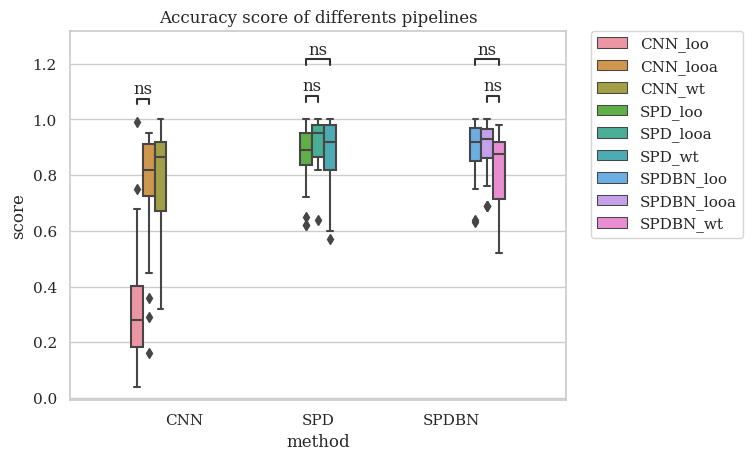

In [41]:
x = "method"
y = "score"
hue = "pipeline"

colors = mcolors.CSS4_COLORS

fig1 = plt.figure(1)
ax = sns.boxplot(data=results_nor, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_nor, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_nor_sgf,
                    pvalues=p_values_by_sort_nor_sgf,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Accuracy score of differents pipelines")


temp = results_rec.copy()
temp.insert(1,"pipeline_renamed",np.repeat(["CNN DG","CNN DA","CNN SS","SPD DG","SPD DA","SPD SS","SPDBN DG","SPDBN DA","SPDBN SS"],12),True)

palettes = {"CNN DG":colors["deepskyblue"],"CNN DA":colors["firebrick"],"CNN SS":colors["forestgreen"],"SPD DG":colors["deepskyblue"],"SPD DA":colors["firebrick"],"SPD SS":colors["forestgreen"],
            "SPDBN DG":colors["deepskyblue"],"SPDBN DA":colors["firebrick"],"SPDBN SS":colors["forestgreen"]}

fig2 = plt.figure(2)
ax = sns.boxplot(data=temp, x=x, y=y, hue="pipeline_renamed",palette=palettes)
add_stat_annotation(ax, data=temp, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec_sgf,
                    pvalues=p_values_by_sort_rec_sgf,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.title("Accuracy score of differents pipelines")
ax.texts[0].set
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

temp = results_rec.copy()
temp.insert(1,"pipeline_renamed",np.repeat(["CNN DG","CNN DA","CNN SS","SPD DG","SPD DA","SPD SS","SPDBN DG","SPDBN DA","SPDBN SS"],12),True)

palettes = {"CNN DG":colors["deepskyblue"],"CNN DA":colors["firebrick"],"CNN SS":colors["forestgreen"],"SPD DG":colors["deepskyblue"],"SPD DA":colors["firebrick"],"SPD SS":colors["forestgreen"],
            "SPDBN DG":colors["deepskyblue"],"SPDBN DA":colors["firebrick"],"SPDBN SS":colors["forestgreen"]}

fig3 = plt.figure(3)
ax = sns.boxplot(data=temp, x=x, y=y, hue="pipeline_renamed",palette=palettes)
add_stat_annotation(ax, data=temp, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec_sgf,
                    pvalues=p_values_by_sort_rec_sgf,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
# plt.title("Accuracy score of differents pipelines")
DG_patch = mpatches.Patch(color=colors["deepskyblue"], label='Domain Generalization')
ax.set_xlabel("")
DA_patch = mpatches.Patch(color=colors["firebrick"], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=colors["forestgreen"], label='Single Subject')
plt.legend(handles=[DG_patch,DA_patch,SS_patch], loc=2, borderaxespad=0.)

NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN


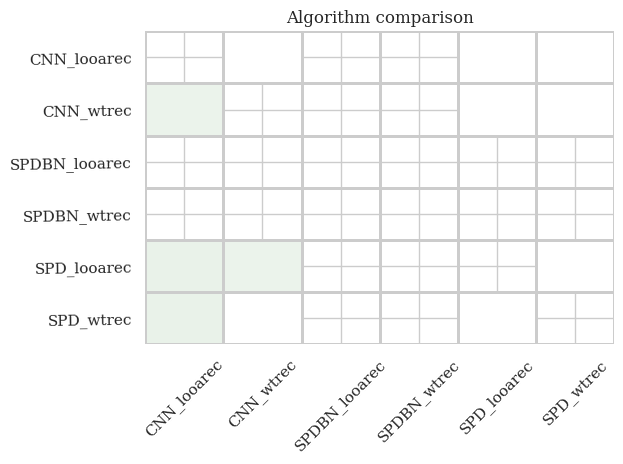

,CNN_looarec,CNN_wtrec,SPDBN_looarec,SPDBN_wtrec,SPD_looarec,SPD_wtrec
CNN_looarec,NaN,0.955313,NaN,NaN,0.99311,0.993110
CNN_wtrec,0.047548,NaN,NaN,NaN,0.97716,0.812625
SPDBN_looarec,NaN,NaN,NaN,NaN,NaN,NaN
SPDBN_wtrec,NaN,NaN,NaN,NaN,NaN,NaN
SPD_looarec,0.006890,0.022840,NaN,NaN,NaN,0.263530
SPD_wtrec,0.006890,0.187375,NaN,NaN,0.73647,NaN


In [33]:
best_results = results_rec.loc[results_rec['pipeline'].isin(["CNN_SSrec","SPD_DArec","SPDBN_SSrec","SPDBN_DArec","CNN_DArec","SPD_SSrec"])]
stats = compute_dataset_statistics(best_results)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()
P

## tps_ test

In [60]:
CNN_DG_v = np.concatenate(CNN_DG_tst.values)
CNN_DA_v = np.concatenate(CNN_DA_tst.values)
CNN_SS_v = np.concatenate(CNN_SS_tst.values)
CNN_DGrec_v = np.concatenate(CNN_DGrec_tst.values)
CNN_DArec_v = np.concatenate(CNN_DArec_tst.values)
CNN_SSrec_v = np.concatenate(CNN_SSrec_tst.values)

SPD_DG_v = np.concatenate(SPD_DG_tst.values)
SPD_DA_v = np.concatenate(SPD_DA_tst.values)
SPD_SS_v = np.concatenate(SPD_SS_tst.values)
SPD_DGrec_v = np.concatenate(SPD_DGrec_tst.values)
SPD_DArec_v = np.concatenate(SPD_DArec_tst.values)
SPD_SSrec_v = np.concatenate(SPD_SSrec_tst.values)

# SPDBN_DG_v = np.concatenate(SPDBN_DG_tst.values)
# SPDBN_DA_v = np.concatenate(SPDBN_DA_tst.values)
# SPDBN_SS_v = np.concatenate(SPDBN_SS_tst.values)
# SPDBN_DGrec_v = np.concatenate(SPDBN_DGrec_tst.values)
# SPDBN_DArec_v = np.concatenate(SPDBN_DArec_tst.values)
# SPDBN_SSrec_v = np.concatenate(SPDBN_SSrec_tst.values)

n_train_DG = 26400
n_train_DA = 27040
n_train_SS = 1120

n_test_DG = 7020
n_test_DA = 5148
n_test_SS = 3744

In [61]:
CNN_DG_v_mean = CNN_DG_tst.mean(axis=0).values
CNN_DA_v_mean = CNN_DA_tst.mean(axis=0).values
CNN_SS_v_mean = CNN_SS_tst.mean(axis=0).values
CNN_DGrec_v_mean = CNN_DGrec_tst.mean(axis=0).values
CNN_DArec_v_mean = CNN_DArec_tst.mean(axis=0).values
CNN_SSrec_v_mean = CNN_SSrec_tst.mean(axis=0).values

SPD_DG_v_mean = SPD_DG_tst.mean(axis=0).values
SPD_DA_v_mean = SPD_DA_tst.mean(axis=0).values
SPD_SS_v_mean = SPD_SS_tst.mean(axis=0).values
SPD_DGrec_v_mean = SPD_DGrec_tst.mean(axis=0).values
SPD_DArec_v_mean = SPD_DArec_tst.mean(axis=0).values
SPD_SSrec_v_mean = SPD_SSrec_tst.mean(axis=0).values

# SPDBN_DG_v_mean = SPDBN_DG_tst.mean(axis=0).values
# SPDBN_DA_v_mean = SPDBN_DA_tst.mean(axis=0).values
# SPDBN_SS_v_mean = SPDBN_SS_tst.mean(axis=0).values
# SPDBN_DGrec_v_mean = SPDBN_DGrec_tst.mean(axis=0).values
# SPDBN_DArec_v_mean = SPDBN_DArec_tst.mean(axis=0).values
# SPDBN_SSrec_v_mean = SPDBN_SSrec_tst.mean(axis=0).values

In [62]:
model_scores = [CNN_DG_v,CNN_DA_v,CNN_SS_v,CNN_DGrec_v,CNN_DArec_v,CNN_SSrec_v,
                SPD_DG_v,SPD_DA_v,SPD_SS_v,SPD_DGrec_v,SPD_DArec_v,SPD_SSrec_v,
                SPDBN_DG_v,SPDBN_DA_v,SPDBN_SS_v,SPDBN_DGrec_v,SPDBN_DArec_v,SPDBN_SSrec_v
                ]
model_scores_mean = [CNN_DG_v_mean,CNN_DA_v_mean,CNN_SS_v_mean,CNN_DGrec_v_mean,CNN_DArec_v_mean,CNN_SSrec_v_mean,
                     SPD_DG_v_mean,SPD_DA_v_mean,SPD_SS_v_mean,SPD_DGrec_v_mean,SPD_DArec_v_mean,SPD_SSrec_v_mean,
                     SPDBN_DG_v_mean,SPDBN_DA_v_mean,SPDBN_SS_v_mean,SPDBN_DGrec_v_mean,SPDBN_DArec_v_mean,SPDBN_SSrec_v_mean
                     ]
names = ["CNN_DG","CNN_DA","CNN_SS","CNN_DGrec","CNN_DArec","CNN_SSrec",
         "SPD_DG","SPD_DA","SPD_SS","SPD_DGrec","SPD_DArec","SPD_SSrec",
         "SPDBN_DG","SPDBN_DA","SPDBN_SS","SPDBN_DGrec","SPDBN_DArec","SPDBN_SSrec"
         ]
list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,
                n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,
               n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

In [65]:
print("median of each fold for CNN_DG:\n",np.median(CNN_DG_tst.median(axis=0)))
print("median of each fold for CNN_DA:\n",np.median(CNN_DA_tst.median(axis=0)))
print("median of each fold for CNN_SS:\n",np.median(CNN_SS_tst.median(axis=0)))
print("median of each fold for CNN_DGrec:\n",np.median(CNN_DGrec_tst.median(axis=0)))
print("median of each fold for CNN_DArec:\n",np.median(CNN_DArec_tst.median(axis=0)))
print("median of each fold for CNN_SSrec:\n",np.median(CNN_SSrec_tst.median(axis=0)))

print("median of each fold for SPD_DG:\n",np.median(SPD_DG_tst.median(axis=0)))
print("median of each fold for SPD_DA:\n",np.median(SPD_DA_tst.median(axis=0)))
print("median of each fold for SPD_SS:\n",np.median(SPD_SS_tst.median(axis=0)))
print("median of each fold for SPD_DGrec:\n",np.median(SPD_DGrec_tst.median(axis=0)))
print("median of each fold for SPD_DArec:\n",np.median(SPD_DArec_tst.median(axis=0)))
print("median of each fold for SPD_SSrec:\n",np.median(SPD_SSrec_tst.median(axis=0)))

median of each fold for CNN_loo:
 124.09116452932358
median of each fold for CNN_looa:
 131.10714834928513
median of each fold for CNN_wt:
 5.205158531665802
median of each fold for CNN_loorec:
 128.72221142053604
median of each fold for CNN_looarec:
 138.39941775798798
median of each fold for CNN_wtrec:
 4.085517406463623
median of each fold for SPD_loo:
 284.1686170697212
median of each fold for SPD_looa:
 317.1602498292923
median of each fold for SPD_wt:
 10.392297327518463
median of each fold for SPD_loorec:
 310.8442229628563
median of each fold for SPD_looarec:
 362.78015553951263
median of each fold for SPD_wtrec:
 10.51542180776596


### Through MOABB

In [63]:
results_all = pd.DataFrame()
results_rec = pd.DataFrame()
results_nor = pd.DataFrame()


for i, score in enumerate(model_scores_mean):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],
                   "n_samples":list_n_train[i],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results = results.append(new_row, ignore_index=True)
        if (i//3) % 2 == 0:
            results_nor = results_nor.append(new_row, ignore_index=True)
        else:
            results_rec = results_rec.append(new_row, ignore_index=True)

NameError: name 'results' is not defined

In [77]:
results

,dataset,subject,session,score,n_samples,n_channels,pipeline,method
0,BurstVEP,0,1,0.874,26400,32,CNN_loo,CNN
1,BurstVEP,1,1,0.874,26400,32,CNN_loo,CNN
2,BurstVEP,2,1,0.875,26400,32,CNN_loo,CNN
3,BurstVEP,3,1,0.903,26400,32,CNN_loo,CNN
4,BurstVEP,4,1,0.911,26400,32,CNN_loo,CNN
...,...,...,...,...,...,...,...,...
643,BurstVEP,7,1,0.979,1120,32,SPDBN_wtrec,SPDBN
644,BurstVEP,8,1,0.895,1120,32,SPDBN_wtrec,SPDBN
645,BurstVEP,9,1,0.994,1120,32,SPDBN_wtrec,SPDBN
646,BurstVEP,10,1,0.903,1120,32,SPDBN_wtrec,SPDBN


In [ ]:
fig1 = moabb_plt.paired_plot(results, "CNN_DG", "CNN_SS")
fig2 = moabb_plt.paired_plot(results, "CNN_DA", "CNN_SS")
fig3 = moabb_plt.paired_plot(results, "SPD_SS", "CNN_SS")
fig1 = moabb_plt.paired_plot(results, "SPD_DG", "SPD_SS")
fig2 = moabb_plt.paired_plot(results, "SPD_DA", "SPD_SS")
fig3 = moabb_plt.paired_plot(results, "SPD_SS", "SPDBN_SS")
fig2 = moabb_plt.paired_plot(results, "SPDBN_DA", "SPDBN_SS")
fig3 = moabb_plt.paired_plot(results, "SPDBN_DG", "SPDBN_SS")
plt.show()

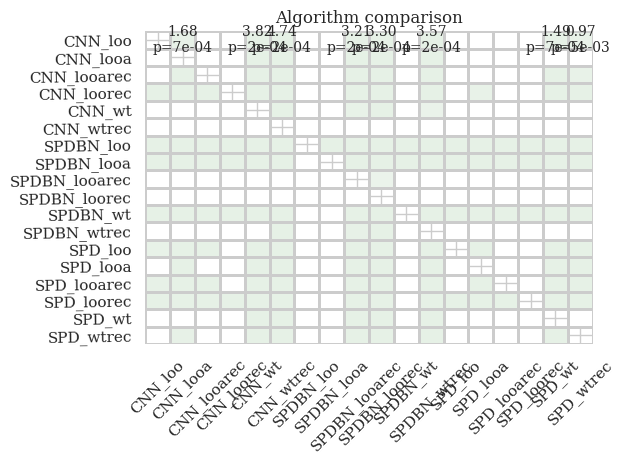

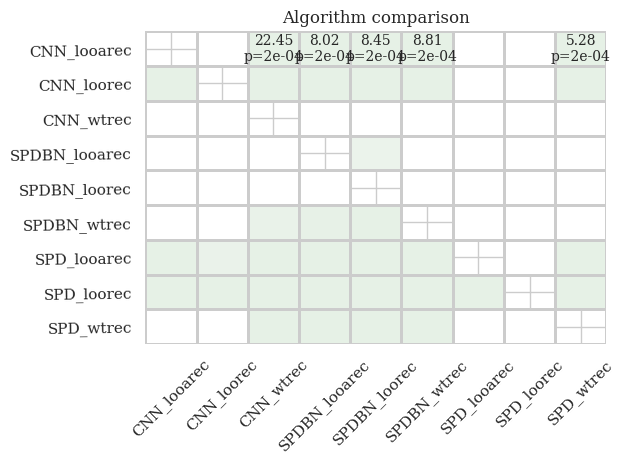

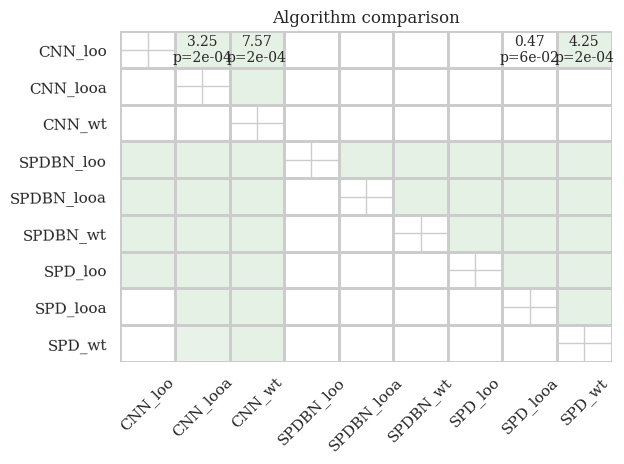

In [82]:
stats = compute_dataset_statistics(results)
P_all, T_all = find_significant_differences(stats)

moabb_plt.summary_plot(P_all, T_all)
plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

stats = compute_dataset_statistics(results_nor)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

In [98]:
P_all = P_all.transpose()

In [99]:
p_values_by_sort_nor = [P_all.iloc[4,0],P_all.iloc[4,1],P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[16,13],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7],P_all.iloc[7,6]]
p_values_by_sort_nor_sgf = [P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7]]


p_values_by_sort_rec = [P_all.iloc[5,3],P_all.iloc[5,2],P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]
p_values_by_sort_rec_sgf = [P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]


### Graph

In [100]:
box_pairs_nor = [(("CNN", "CNN_SS"), ("CNN", "CNN_DG")),
                                 (("CNN", "CNN_SS"), ("CNN", "CNN_DA")),
                                 (("CNN", "CNN_DA"), ("CNN", "CNN_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DA")),
                                 (("SPD", "SPD_DA"), ("SPD", "SPD_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DA")),
                                 (("SPDBN", "SPDBN_DA"), ("SPDBN", "SPDBN_DG")),
                                ]
box_pairs_nor_sgf = [(("CNN", "CNN_DA"), ("CNN", "CNN_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DG")),
                                 (("SPD", "SPD_DA"), ("SPD", "SPD_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DA")),
                                ]

box_pairs_rec = [(("CNN", "CNN_SSrec"), ("CNN", "CNN_DGrec")),
                                 (("CNN", "CNN_SSrec"), ("CNN", "CNN_DArec")),
                                 (("CNN", "CNN_DArec"), ("CNN", "CNN_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DArec")),
                                 (("SPD", "SPD_DArec"), ("SPD", "SPD_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DArec")),
                                 (("SPDBN", "SPDBN_DArec"), ("SPDBN", "SPDBN_DGrec")),
                                ]
box_pairs_rec_sgf = [(("CNN", "CNN_DArec"), ("CNN", "CNN_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DArec")),
                                 (("SPD", "SPD_DArec"), ("SPD", "SPD_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DArec")),
                                 (("SPDBN", "SPDBN_DArec"), ("SPDBN", "SPDBN_DGrec")),
                                ]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_looa v.s. CNN_CNN_wt: Custom statistical test, P_val:4.883e-04
CNN_CNN_loo v.s. CNN_CNN_looa: Custom statistical test, P_val:7.324e-04
SPD_SPD_loo v.s. SPD_SPD_looa: Custom statistical test, P_val:2.441e-04
SPD_SPD_looa v.s. SPD_SPD_wt: Custom statistical test, P_val:2.441e-04
SPDBN_SPDBN_looa v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:2.441e-04
SPDBN_SPDBN_loo v.s. SPDBN_SPDBN_looa: Custom statistical test, P_val:2.441e-04
CNN_CNN_loo v.s. CNN_CNN_wt: Custom statistical test, P_val:2.441e-04
SPD_SPD_loo v.s. SPD_SPD_wt: Custom statistical test, P_val:2.441e-04
SPDBN_SPDBN_loo v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:2.441e-04
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_l

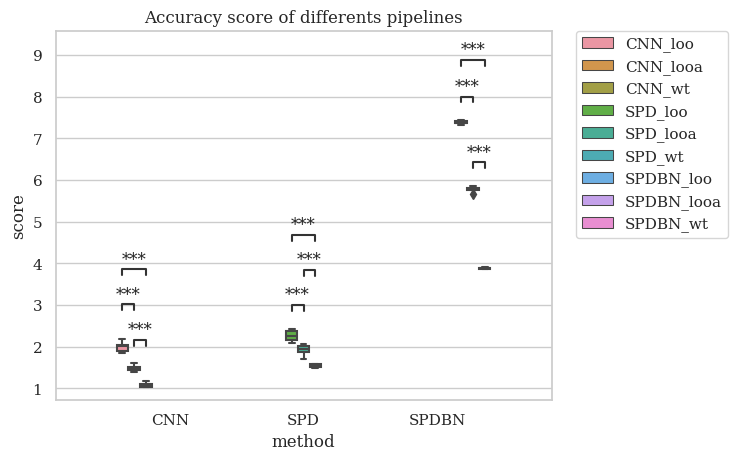

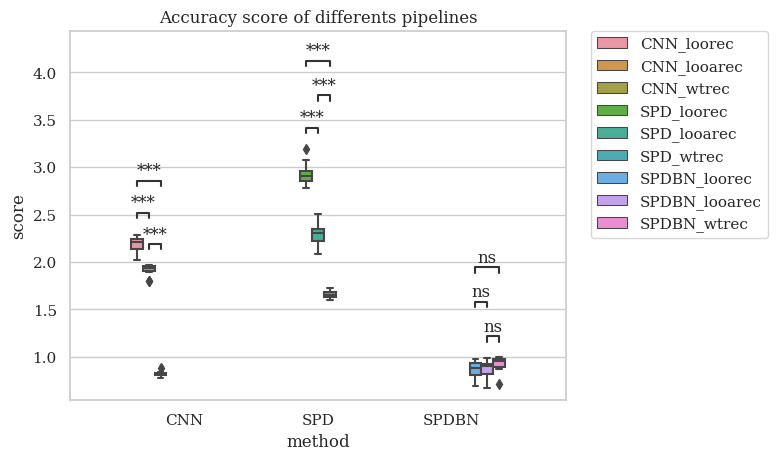

In [101]:
x = "method"
y = "score"
hue = "pipeline"

fig1 = plt.figure(1)
ax = sns.boxplot(data=results_nor, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_nor, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_nor,
                    pvalues=p_values_by_sort_nor,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Accuracy score of differents pipelines")

fig2 = plt.figure(2)
ax = sns.boxplot(data=results_rec, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_rec, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec,
                    pvalues=p_values_by_sort_rec,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.title("Accuracy score of differents pipelines")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## All in one

In [121]:
from itertools import combinations
from math import factorial

n_comparisons = factorial(len(model_scores)) / (
    factorial(2) * factorial(len(model_scores) - 2)
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores[model_i]
    model_k_scores = model_scores[model_k]
    differences = model_i_scores - model_k_scores

    n = differences.shape[0]  # number of test sets
    df = n - 1

    n_train = int((list_n_train[model_i] + list_n_train[model_k])/2)
    n_test = int((list_n_test[model_i] + list_n_test[model_k])/2)

    t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
    # p_val *= n_comparisons  # implement Bonferroni correction
    # # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [names[model_i], names[model_k], t_stat, p_val]
    )

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_stat", "p_val"]
).round(3)
pairwise_comp_df

,model_1,model_2,t_stat,p_val
0,CNN_loo,CNN_looa,-0.733,0.232
1,CNN_loo,CNN_wt,-0.706,0.241
2,CNN_loo,SPD_loo,-0.375,0.354
3,CNN_loo,SPD_looa,-0.777,0.219
4,CNN_loo,SPD_wt,-0.473,0.319
5,CNN_loo,SPDBN_loo,0.333,0.370
6,CNN_loo,SPDBN_looa,0.076,0.470
7,CNN_loo,SPDBN_wt,-0.785,0.217
8,CNN_looa,CNN_wt,-0.225,0.411
9,CNN_looa,SPD_loo,0.305,0.380


In [142]:
from itertools import combinations
from math import factorial

n_comparisons = factorial(len(model_scores)) / (
    factorial(2) * factorial(len(model_scores) - 2)
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores[model_i]
    model_k_scores = model_scores[model_k]
    differences = model_i_scores - model_k_scores

    n = differences.shape[0]  # number of test sets
    df = n - 1

    n_train = int((list_n_train[model_i] + list_n_train[model_k])/2)
    n_test = int((list_n_test[model_i] + list_n_test[model_k])/2)

    t_stat, p_val = scipy.stats.ttest_ind(model_i_scores,model_k_scores,equal_var=False)
    # p_val *= n_comparisons  # implement Bonferroni correction
    # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [names[model_i], names[model_k], t_stat, p_val]
    )

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_stat", "p_val"]
).round(3)
pairwise_comp_df

,model_1,model_2,t_stat,p_val
0,CNN_loo,CNN_looa,-2.810,0.005
1,CNN_loo,CNN_wt,-4.156,0.000
2,CNN_loo,CNN_loorec,-2.115,0.035
3,CNN_loo,CNN_looarec,-3.289,0.001
4,CNN_loo,CNN_wtrec,-4.642,0.000
...,...,...,...,...
100,SPD_wtrec,SPDBN_looa,4.151,0.000
101,SPD_wtrec,SPDBN_wt,-0.137,0.891
102,SPDBN_loo,SPDBN_looa,-0.923,0.357
103,SPDBN_loo,SPDBN_wt,-5.845,0.000


In [145]:
p_scores = np.ones((15,15))
start_idx = 0
for k in range(15,0,-1):
    p_scores[15-k,15-k+1:] = pairwise_comp_df.iloc[start_idx:start_idx+k-1,3]
    start_idx += k-1

p_scores = p_scores.transpose()
p_scores

array([[1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.005, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.232, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.035, 0.464, 0.047, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.001, 0.659, 0.455, 0.234, 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.068, 0.453, 0.01 , 0.157, 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.082, 0.249, 0.014, 0.679, 0.104, 0.002, 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.001, 0.618, 0.446, 0.198, 0.974, 0.143, 0.08 , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.004, 0.868, 0.

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:262: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


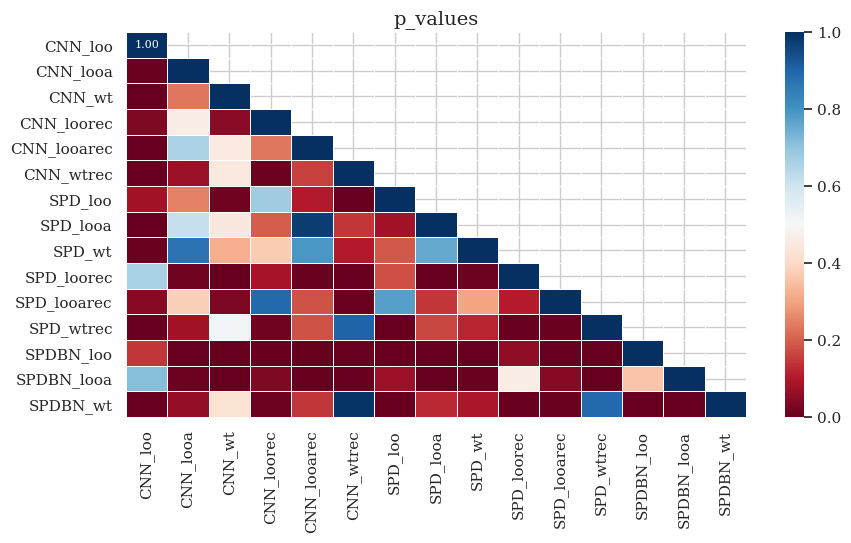

In [146]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title("p_values", fontsize=14)

mask = np.zeros_like(p_scores, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

# Generate the heatmap including the mask
heatmap = sns.heatmap(p_scores,
                      annot=True,
                      annot_kws={"fontsize": 8},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='RdBu',
                      mask=mask, # the mask has been included here
                      xticklabels=names,
                      yticklabels=names,
                      ax=ax)

# Display our plot
plt.show()

## test SS CNN / SPD

In [58]:
differences = CNN_SS_v - SPD_SS_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_SS
n_test = n_test_SS

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.103
Corrected p-value: 0.459


In [59]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_SS_v,SPD_SS_v,equal_var=False)


Uncorrected t-value: 2.066
Uncorrected p-value: 0.020


Ttest_indResult(statistic=1.0021328518901647, pvalue=0.3173364892726997)

## test DG CNN / SPD

In [60]:
differences = CNN_DG_v - SPD_DG_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DG
n_test = n_test_DG

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.375
Corrected p-value: 0.354


In [61]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_DG_v,SPD_DG_v,equal_var=False)


Uncorrected t-value: -2.153
Uncorrected p-value: 0.017


Ttest_indResult(statistic=-1.7448060172939428, pvalue=0.08232743328844182)

## test DA CNN / SPD

In [62]:
differences = CNN_DA_v - SPD_DA_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DA
n_test = n_test_DA

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.160
Corrected p-value: 0.436


In [63]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_DA_v,SPD_DA_v,equal_var=False)

Uncorrected t-value: -0.784
Uncorrected p-value: 0.217


Ttest_indResult(statistic=-0.49871633980158486, pvalue=0.6184523377337583)

## test SS CNN / SPDBN

In [64]:
differences = CNN_SS_v - SPDBN_SS_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_SS
n_test = n_test_SS

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.071
Corrected p-value: 0.472


In [65]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_SS_v,SPDBN_SS_v,equal_var=False)


Uncorrected t-value: -1.421
Uncorrected p-value: 0.079


Ttest_indResult(statistic=-0.792722147644561, pvalue=0.4287305977010901)

## test DG CNN / SPDBN

In [66]:
differences = CNN_DG_v - SPDBN_DG_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DG
n_test = n_test_DG

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.333
Corrected p-value: 0.370


In [67]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_DG_v,SPDBN_DG_v,equal_var=False)


Uncorrected t-value: 1.908
Uncorrected p-value: 0.029


Ttest_indResult(statistic=1.4717858681179092, pvalue=0.14244123942633424)

## test DA CNN / SPDBN

In [68]:
differences = CNN_DA_v - SPDBN_DA_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DA
n_test = n_test_DA

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.670
Corrected p-value: 0.252


In [69]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_DA_v,SPDBN_DA_v,equal_var=False)

Uncorrected t-value: 3.273
Uncorrected p-value: 0.001


Ttest_indResult(statistic=2.6953646696186486, pvalue=0.007606903159761997)

## test SS SPDBN / SPD

In [70]:
differences = SPDBN_SS_v - SPD_SS_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_SS
n_test = n_test_SS

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.202
Corrected p-value: 0.420


In [71]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(SPDBN_SS_v,SPD_SS_v,equal_var=False)


Uncorrected t-value: 4.051
Uncorrected p-value: 0.000


Ttest_indResult(statistic=1.6984990387107397, pvalue=0.09075225889331986)

## test DG SPDBN / SPD

In [72]:
differences = SPDBN_DG_v - SPD_DG_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DG
n_test = n_test_DG

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.766
Corrected p-value: 0.222


In [73]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(SPDBN_DG_v,SPD_DG_v,equal_var=False)


Uncorrected t-value: -4.397
Uncorrected p-value: 0.000


Ttest_indResult(statistic=-3.1065157512724224, pvalue=0.0021427886034054394)

## test DA SPDBN / SPD

In [74]:
differences = SPDBN_DA_v - SPD_DA_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DA
n_test = n_test_DA

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.930
Corrected p-value: 0.177


In [75]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(SPDBN_DA_v,SPD_DA_v,equal_var=False)

Uncorrected t-value: -4.543
Uncorrected p-value: 0.000


Ttest_indResult(statistic=-3.202195076606427, pvalue=0.0016013243814845344)

# Other

### score code

In [21]:
df0_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_0.csv",index_col=0)
df1_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_1.csv",index_col=0)
df2_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_2.csv",index_col=0)
df3_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_0.csv",index_col=0)
df4_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_4.csv",index_col=0)
df5_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_5.csv",index_col=0)
df6_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_6.csv",index_col=0)
df7_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_7.csv",index_col=0)
df8_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_8.csv",index_col=0)
df9_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_9.csv",index_col=0)
df10_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_10.csv",index_col=0)
df11_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_11.csv",index_col=0)

df0_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_0.csv",index_col=0)
df1_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_1.csv",index_col=0)
df2_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_2.csv",index_col=0)
df3_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_0.csv",index_col=0)
df4_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_4.csv",index_col=0)
df5_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_5.csv",index_col=0)
df6_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_6.csv",index_col=0)
df7_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_7.csv",index_col=0)
df8_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_8.csv",index_col=0)
df9_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_9.csv",index_col=0)
df10_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_10.csv",index_col=0)
df11_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_11.csv",index_col=0)

df0_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_0.csv",index_col=0)
df1_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_1.csv",index_col=0)
df2_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_2.csv",index_col=0)
df3_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_0.csv",index_col=0)
df4_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_4.csv",index_col=0)
df5_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_5.csv",index_col=0)
df6_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_6.csv",index_col=0)
df7_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_7.csv",index_col=0)
df8_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_8.csv",index_col=0)
df9_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_9.csv",index_col=0)
df10_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_10.csv",index_col=0)
df11_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_11.csv",index_col=0)

In [23]:
df_SS = pd.concat([df0_SS,df1_SS,df2_SS,df3_SS,df4_SS,df5_SS,df6_SS,df7_SS,df8_SS,df9_SS,df10_SS,df11_SS], axis=1, ignore_index=True)
df_DG = pd.concat([df0_DG,df1_DG,df2_DG,df3_DG,df4_DG,df5_DG,df6_DG,df7_DG,df8_DG,df9_DG,df10_DG,df11_DG], axis=1, ignore_index=True)
df_DA = pd.concat([df0_DA,df1_DA,df2_DA,df3_DA,df4_DA,df5_DA,df6_DA,df7_DA,df8_DA,df9_DA,df10_DA,df11_DA], axis=1, ignore_index=True)

print(df_SS.mean(axis=0).mean())
print(SPDBN_SS_sc.mean(axis=0).mean())

0.9238333333333334
0.9083333333333332


In [30]:
df_SS.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_DG.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_DA.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_SS.to_csv("./results/score_code/SPDBN_SS_score_code_recentered.csv")
df_DG.to_csv("./results/score_code/SPDBN_DG_score_code_recentered.csv")
df_DA.to_csv("./results/score_code/SPDBN_DA_score_code_recentered.csv")

In [26]:
print(df_DG.mean(axis=0))
print(SPDBN_DG_sc.mean(axis=0))

0     0.895
1     0.818
2     0.923
3     0.895
4     0.964
5     0.977
6     0.844
7     0.952
8     0.730
9     0.872
10    0.786
11    0.693
dtype: float64
1     0.854
2     0.834
3     0.860
4     0.737
5     0.873
6     0.969
7     0.797
8     0.773
9     0.728
10    0.986
11    0.793
12    0.612
dtype: float64


In [28]:
print(df_DA.mean(axis=0).mean())
print(SPDBN_DA_sc.mean(axis=0).mean())

0.8759166666666666
0.836


### tps test

In [68]:
df0_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_0.csv",index_col=0)
df1_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_1.csv",index_col=0)
df2_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_2.csv",index_col=0)
df3_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_0.csv",index_col=0)
df4_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_4.csv",index_col=0)
df5_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_5.csv",index_col=0)
df6_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_6.csv",index_col=0)
df7_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_7.csv",index_col=0)
df8_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_8.csv",index_col=0)
df9_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_9.csv",index_col=0)
df10_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_10.csv",index_col=0)
df11_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_11.csv",index_col=0)

df0_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_0.csv",index_col=0)
df1_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_1.csv",index_col=0)
df2_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_2.csv",index_col=0)
df3_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_0.csv",index_col=0)
df4_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_4.csv",index_col=0)
df5_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_5.csv",index_col=0)
df6_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_6.csv",index_col=0)
df7_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_7.csv",index_col=0)
df8_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_8.csv",index_col=0)
df9_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_9.csv",index_col=0)
df10_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_10.csv",index_col=0)
df11_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_11.csv",index_col=0)

df0_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_0.csv",index_col=0)
df1_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_1.csv",index_col=0)
df2_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_2.csv",index_col=0)
df3_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_0.csv",index_col=0)
df4_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_4.csv",index_col=0)
df5_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_5.csv",index_col=0)
df6_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_6.csv",index_col=0)
df7_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_7.csv",index_col=0)
df8_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_8.csv",index_col=0)
df9_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_9.csv",index_col=0)
df10_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_10.csv",index_col=0)
df11_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_11.csv",index_col=0)

In [71]:
df_SS.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_DG.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_DA.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_SS.to_csv("../results/tps_test/SPDBN_SS_tps_test_recentered.csv")
df_DG.to_csv("../results/tps_test/SPDBN_DG_tps_test_recentered.csv")
df_DA.to_csv("../results/tps_test/SPDBN_DA_tps_test_recentered.csv")